<a href="https://colab.research.google.com/github/maskmo/Data-Mining/blob/main/RecommendationSystems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1

In [ ]:
!pip install python-docx

import docx
from google.colab import files

uploaded = files.upload()
file_name = '/content/RecommendationSystems.docx'
doc = docx.Document(file_name)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving RecommendationSystems.docx to RecommendationSystems (1).docx


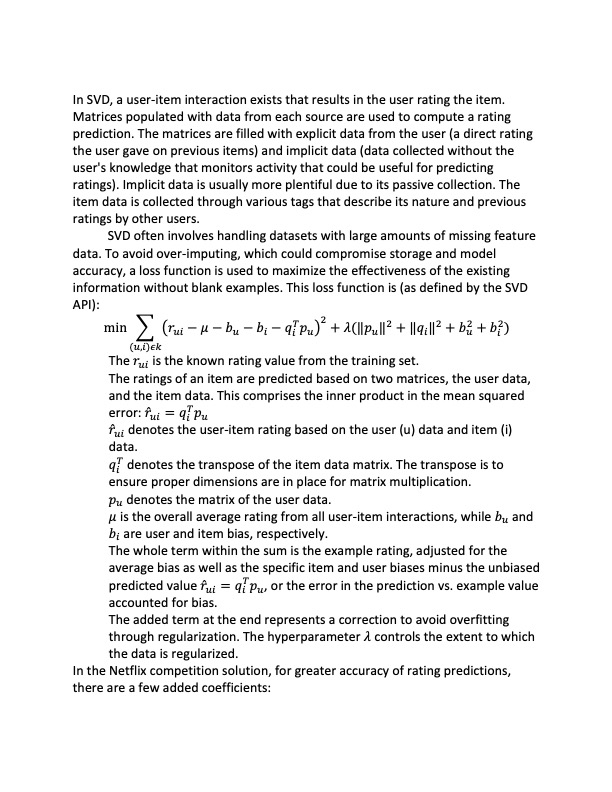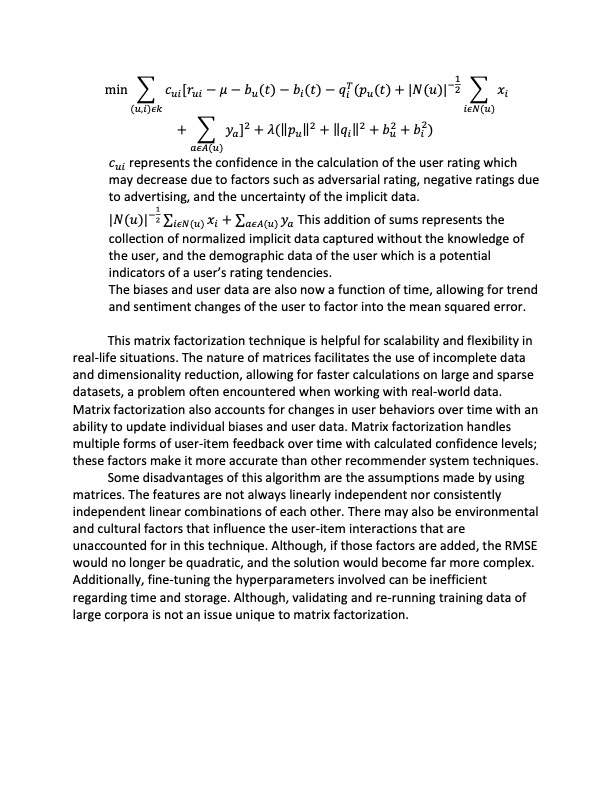

# Task 2

In [ ]:
# Importing and downloading necessary libraries

!pip install scikit-surprise

import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise import BaselineOnly
from surprise.model_selection import cross_validate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Importing documents that turned out to be unnecessary because Surprise facilitates data management

FolderPath = '/content/MovieLensSmall/'
links = pd.read_csv(FolderPath + "links.csv")
movies = pd.read_csv(FolderPath + "movies.csv")
ratings = pd.read_csv(FolderPath + "ratings.csv")
tags = pd.read_csv(FolderPath + "tags.csv")
data_frame = {"links": links,
              "movies": movies,
              "ratings": ratings,
              "tags": tags}
data_frame_concat = pd.concat([links, movies, ratings, tags], keys = ["links", "movies", "ratings", "tags"], ignore_index=True)
# data_frame_merge = pd.merge([links, movies, ratings, tags], on="movieID")

In [ ]:
data_frame_2 = pd.merge(data_frame["movies"], data_frame["ratings"], on="movieId", how="left")
data_frame_3 = pd.merge(data_frame_2, data_frame["tags"], on="movieId", how="left")
data_frame_merge = pd.merge(data_frame_3, data_frame["links"], on="movieId", how="left")
print(data_frame_merge.describe())

             movieId       userId_x         rating   timestamp_x  \
count  285783.000000  285762.000000  285762.000000  2.857620e+05   
mean    14927.663741     313.894279       3.841270  1.214707e+09   
std     31402.673519     179.451387       1.020798  2.233730e+08   
min         1.000000       1.000000       0.500000  8.281246e+08   
25%       296.000000     160.000000       3.000000  1.019133e+09   
50%      1721.000000     314.000000       4.000000  1.211377e+09   
75%      5673.000000     465.000000       4.500000  1.445346e+09   
max    193609.000000     610.000000       5.000000  1.537799e+09   

            userId_y   timestamp_y        imdbId         tmdbId  
count  233234.000000  2.332340e+05  2.857830e+05  285770.000000  
mean      470.681354  1.384754e+09  2.956050e+05   12797.315320  
std       153.324249  1.534705e+08  5.150156e+05   43479.255523  
min         2.000000  1.137179e+09  4.170000e+02       2.000000  
25%       424.000000  1.242494e+09  1.098300e+05     489.

In [ ]:
# Checking through cross validation the effectiveness of the SVD algorithm on the larger movie lens dataset.
# The measures were set to root mean squared error and mean average error, with a 5 fold cross validation as set in the example.
# Verbose was set to true to observe the error analysis.
# file_path = "/content/ml-latest"
# file_path = os.path.expanduser("/content/ml-latest/ratings.csv")
# reader = Reader(line_format="user item rating timestamp", sep="\t", rating_scale = (0,5))
algo = SVD( )
# reader = Reader(rating_scale=(0,5))
# data = Dataset.load_from_df(data_frame_merge, reader)
data = Dataset.load_builtin('ml-1m')
# data = Dataset.load_from_file(file_path, reader=reader)
# data = Dataset.load_from_df(ratings['rating'], reader)
# print(data)
cross_validate(algo, data, measures=["rmse","mae"], cv = 5, verbose = True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8720  0.8742  0.8751  0.8741  0.8753  0.8741  0.0012  
MAE (testset)     0.6846  0.6857  0.6868  0.6858  0.6871  0.6860  0.0009  
Fit time          22.27   18.28   17.26   19.20   20.51   19.50   1.75    
Test time         3.71    3.31    2.66    4.01    3.75    3.49    0.47    


{'test_rmse': array([0.87197632, 0.87418474, 0.87514347, 0.87414697, 0.8752843 ]),
 'test_mae': array([0.68457552, 0.6856543 , 0.68678131, 0.68582173, 0.6870664 ]),
 'fit_time': (22.26917552947998,
  18.284549474716187,
  17.256813049316406,
  19.19874095916748,
  20.513821125030518),
 'test_time': (3.711951732635498,
  3.3069944381713867,
  2.6610331535339355,
  4.005518436431885,
  3.747410297393799)}

# Task 3

In [ ]:
# Import and download necessary libraries, I could not figure out for my life how to download recommenders library.
!pip install papermill
!pip install pypi
!pip install nni
!pip install --upgrade ipython
# !pip install git+https://github.com/microsoft/recommenders.git

import sys
import json
import os
import surprise
import papermill as pm
import shutil
import subprocess
import yaml
import pkg_resources
from tempfile import TemporaryDirectory
from nni.experiment import Experiment

# import recommenders
# from recommenders.utils.timer import Timer
# from recommenders.datasets import movielens
# from recommenders.datasets.python_splitters import python_random_split
# from recommenders.evaluation.python_evaluation import rmse, precision_at_k, ndcg_at_k
# from recommenders.tuning.nni.nni_utils import (check_experiment_status, check_stopped, check_metrics_written, get_trials,
#                                       stop_nni, start_nni)
# from recommenders.models.surprise.surprise_utils import predict, compute_ranking_predictions

print("System version: {}".format(sys.version))
print("Surprise version: {}".format(surprise.__version__))
# print("NNI version: {}".format(pkg_resources.get_distribution("nni").version))

%load_ext autoreload
%autoreload 2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
System version: 3.10.12 (main, Jun  7 2023, 12:45:35) [GCC 9.4.0]
Surprise version: 1.1.3


In [ ]:
ml_data_size = "1m"
reader = "ml-1m"
temp_dir = TemporaryDirectory()
TMP_DIR = temp_dir.name
epochs = 30
trials = 10
df = pd.read_csv("/content/ml-latest/ratings.csv")

# time (in seconds) to wait for each tuning experiment to complete
WAITING_TIME = 20
MAX_RETRIES = 40 # it is recommended to have MAX_RETRIES>=4*MAX_TRIAL_NUM

temp_dir = TemporaryDirectory()
data = df.load_pandas_df(
    size=ml_data_size,
    header=["userID", "itemID", "rating"]
)

AttributeError: ignored

In [ ]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[I 2023-06-22 02:48:24,177] A new study created in memory with name: no-name-2a2d45fc-377c-41d9-848d-d4eabf6296a4
[I 2023-06-22 02:48:24,184] Trial 0 finished with value: 3.7246157980497157 and parameters: {'x': 0.07007362885271817}. Best is trial 0 with value: 3.7246157980497157.
[I 2023-06-22 02:48:24,188] Trial 1 finished with value: 19.774200730227417 and parameters: {'x': 6.446819169949169}. Best is trial 0 with value: 3.7246157980497157.
[I 2023-06-22 02:48:24,192] Trial 2 finished with value: 124.14282785484978 and parameters: {'x': -9.14194003999527}. Best is trial 0 with value: 3.7246157980497157.
[I 2023-06-22 02:48:24,196] Trial 3 finished with value: 1.5189940185970727 and parameters: {'x': 0.7675252462638138}. Best is trial 3 with value: 1.5189940185970727.
[I 2023-06-22 02:48:24,200] Trial 4 finished with value: 0.0011571643347970948 and parameters: {'x': 2.0340171182612092}. Best is trial 4 with value: 0.0011571643347970948.
[I 2023-06-22 02:48:24,202] Trial 5 finished w

In [ ]:
from surprise.model_selection import train_test_split
from surprise import accuracy
import optuna

In [ ]:
import sklearn.datasets
import sklearn.ensemble
import sklearn.model_selection
import sklearn.svm

In [ ]:
epochs = 30
trials = 10
algo = SVD( )
data = Dataset.load_builtin('ml-1m')
# result = cross_validate(algo, data, measures=["rmse","mae"], cv = 5, verbose = True)

trainset, testset = train_test_split(data, test_size=0.25)
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)
data.describe()
# def objective(trial):
#     x = trial.suggest_int('epochs', 1, 30)
#     return SVD(epochs).fit(trainset)

# study = optuna.create_study()
# study.optimize(objective, n_trials=trials)

RMSE: 0.8770


AttributeError: ignored

In [ ]:


def objective(trial):
    ml = sklearn.datasets.data
    x = df
    y = df["rating"]

    classifier_name = trial.suggest_categorical("classifier", ["SVC", "RandomForest"])
    if classifier_name == "SVC":
        svc_c = trial.suggest_float("svc_c", 1e-10, 1e10, log=True)
        classifier_obj = sklearn.svm.SVC(C=svc_c, gamma="auto")
    else:
        rf_max_depth = trial.suggest_int("rf_max_depth", 2, 32, log=True)
        classifier_obj = sklearn.ensemble.RandomForestClassifier(
            max_depth=rf_max_depth, n_estimators=10
        )

    score = sklearn.model_selection.cross_val_score(classifier_obj, x, y, n_jobs=-1, cv=3)
    accuracy = score.mean()
    return accuracy


if __name__ == "__main__":
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=100)
    print(study.best_trial)

[I 2023-06-22 03:39:20,851] A new study created in memory with name: no-name-ddcd289c-a5e6-4e97-8bc4-ac99c31b8fa7
[W 2023-06-22 03:39:24,589] Trial 0 failed with parameters: {'classifier': 'SVC', 'svc_c': 0.3053226407442784} because of the following error: ValueError('\nAll the 3 fits failed.\nIt is very likely that your model is misconfigured.\nYou can try to debug the error by setting error_score=\'raise\'.\n\nBelow are more details about the failures:\n--------------------------------------------------------------------------------\n3 fits failed with the following error:\nTraceback (most recent call last):\n  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score\n    estimator.fit(X_train, y_train, **fit_params)\n  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 201, in fit\n    y = self._validate_targets(y)\n  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 745, in _val

ValueError: ignored